In [210]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 149.8 kB/s eta 0:01:03
   -- ----------

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)
import statsmodels.api as sm

In [215]:
df=pd.read_csv(r'C:\\Users\\Rahul\\Desktop\\Data analysis project\\datasets\\cardioActivities.csv')

In [216]:
df

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2012-08-28 07:06:57,f5218490-a372-44c8-bb20-de3b91984cbe,Walking,NaN,1.57,13:39,8:41,6.91,926743.0,7,NaN,NaN,NaN,2012-08-28-070657.gpx
504,2012-08-24 12:59:42,018f66a7-da5e-4985-a8fe-725a33317c87,Walking,NaN,1.48,17:56,12:09,4.94,942192.0,12,NaN,NaN,NaN,2012-08-24-125942.gpx
505,2012-08-24 10:12:16,7acec95a-d63d-435d-837c-7befb352f500,Walking,NaN,1.49,13:43,9:14,6.49,924486.0,9,NaN,NaN,NaN,2012-08-24-101216.gpx
506,2012-08-24 08:13:12,f790bdb2-b921-4018-bd39-d59d870c5847,Running,NaN,3.15,16:00,5:05,11.82,2288868.0,17,NaN,NaN,NaN,2012-08-24-081312.gpx


In [217]:
df.drop(['Friend\'s Tagged','Route Name','GPX File','Activity Id', 'Notes'],axis=1,inplace=True)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Type                      508 non-null    object 
 2   Distance (km)             508 non-null    float64
 3   Duration                  508 non-null    object 
 4   Average Pace              508 non-null    object 
 5   Average Speed (km/h)      508 non-null    float64
 6   Calories Burned           508 non-null    float64
 7   Climb (m)                 508 non-null    int64  
 8   Average Heart Rate (bpm)  294 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 35.8+ KB


In [175]:
df['Type'].value_counts()

Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

In [251]:
df['Type']=df['Type'].replace(['Other'],'Unicycling')

In [252]:
unique_type=df['Type'].value_counts()
unique_type

Type
Running       459
Cycling        29
Walking        18
Unicycling      2
Name: count, dtype: int64

In [178]:
avg_hr_run = df[df['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()

In [15]:
avg_hr_cycle = df[df['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

In [16]:
avg_hr_run

144.985559566787

In [17]:
avg_hr_cycle

124.4

In [18]:
df['Average Heart Rate (bpm)'].describe()

count    294.000000
mean     143.530612
std       10.583848
min       77.000000
25%      140.000000
50%      144.000000
75%      149.000000
max      172.000000
Name: Average Heart Rate (bpm), dtype: float64

In [242]:
df_run = df[df['Type'] == 'Running'].copy()
df_walk = df[df['Type'] == 'Walking'].copy()
df_run = df[df['Type'] == 'Cycling'].copy()

In [243]:
df_run

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
8,2018-10-06 16:45:02,Cycling,19.63,1:26:26,4:24,13.63,577.0,210,79.0
10,2018-09-16 14:55:03,Cycling,32.61,1:55:15,3:32,16.98,830.0,462,118.0
12,2018-09-01 17:06:15,Cycling,36.89,1:58:39,3:13,18.65,937.0,491,122.0
13,2018-08-28 18:44:33,Cycling,28.17,1:27:07,3:06,19.40,685.0,400,111.0
14,2018-08-25 17:18:32,Cycling,19.41,1:11:33,3:41,16.28,536.0,199,124.0
87,2017-09-22 12:27:14,Cycling,49.18,2:42:32,3:18,18.15,852.0,367,NaN
97,2017-08-17 18:36:00,Cycling,15.53,40:04,2:35,23.25,380.0,164,138.0
129,2017-05-01 17:38:35,Cycling,20.19,54:29,2:42,22.24,491.0,204,135.0
179,2016-10-03 11:47:16,Cycling,23.62,1:12:42,3:05,19.50,606.0,301,126.0
187,2016-09-10 17:13:51,Cycling,13.11,32:47,2:30,23.99,328.0,163,136.0


In [80]:
pd.isnull(df).sum()

Date                          0
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

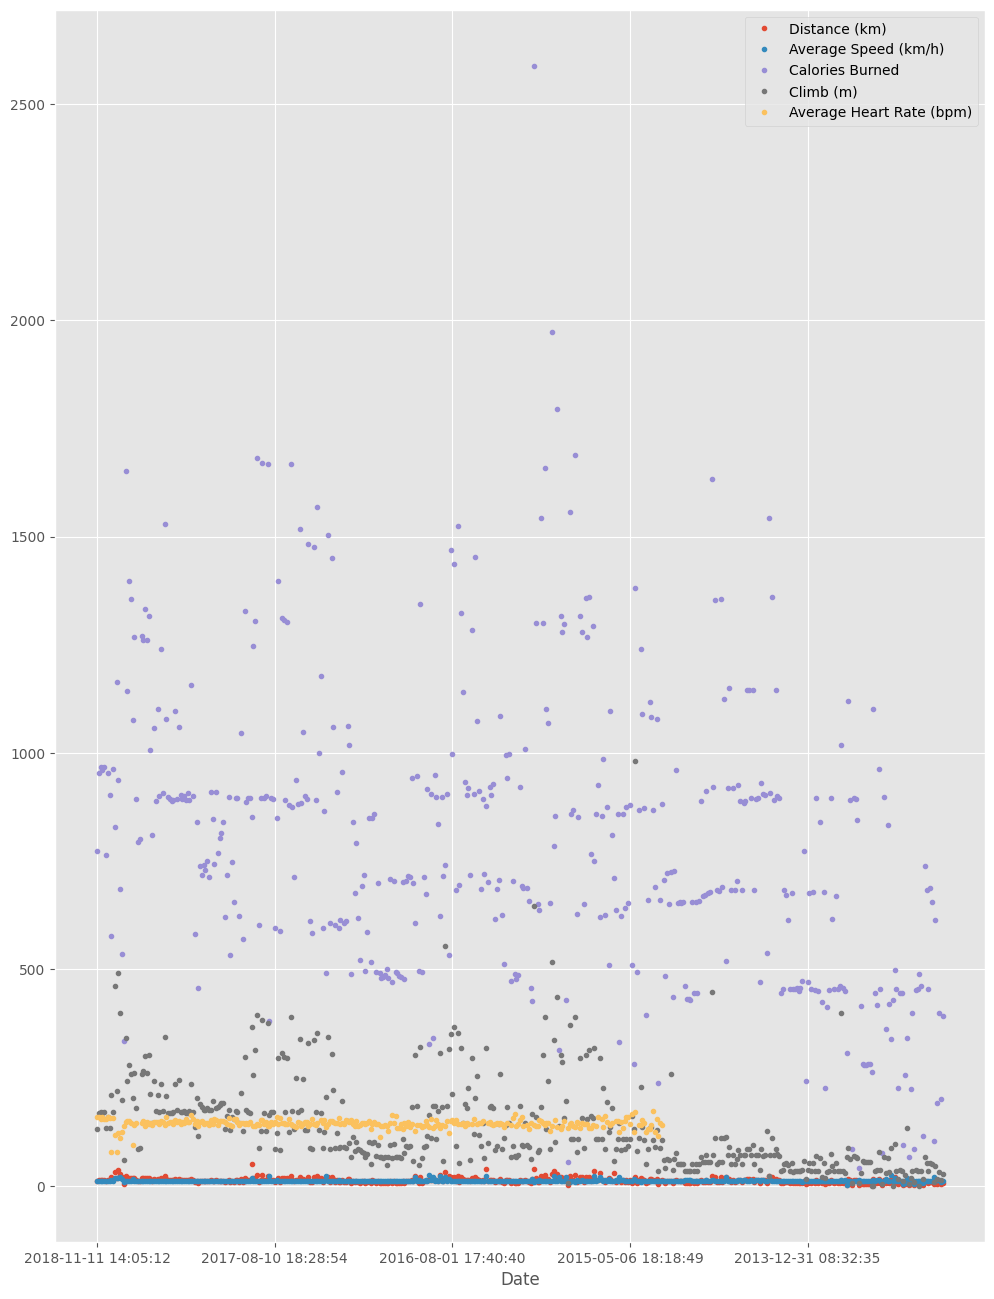

In [109]:
runs_subset_2013_2018 = df[(df['Date'] >= '2013-01-01') & (df['Date'] <= '2018-12-31')]

# Create, plot, and customize in one step
runs_subset_2013_2018.plot(
    x='Date',
    kind='line',
    linestyle='none',
    marker='o',
    markersize=3,
    figsize=(12, 16),
    sharex=False
)

# Show plot
plt.show()

In [202]:
runs_subset_2013_2018 = df[(df['Date'] >= '2013-01-01') & (df['Date'] <= '2018-12-31')]

In [203]:
runs_subset_2013_2018

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
0,2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,774.0,130,159.0
1,2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,954.0,168,159.0
2,2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,967.0,171,155.0
3,2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,960.0,169,158.0
4,2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,967.0,170,154.0
...,...,...,...,...,...,...,...,...,...
472,2013-01-23 18:38:29,Running,8.65,50:13,5:48,10.34,614.0,45,NaN
473,2013-01-19 09:58:50,Running,3.39,15:56,4:42,12.75,190.0,15,NaN
474,2013-01-15 18:40:08,Running,6.72,32:42,4:52,12.34,398.0,32,NaN
475,2013-01-12 08:39:55,Running,3.09,20:07,6:31,9.21,201.0,13,NaN


In [27]:
pd.isnull(df).sum()

Date                        0
Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Calories Burned             0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

In [111]:
groupby_type=df.groupby(['Type'])[['Calories Burned','Distance (km)']].sum()

In [112]:
groupby_type

,Calories Burned,Distance (km)
Type,,
Cycling,1.619600e+04,680.58
Running,6.727389e+06,5224.50
Unicycling,2.239000e+03,34.45
Walking,2.795414e+06,33.45


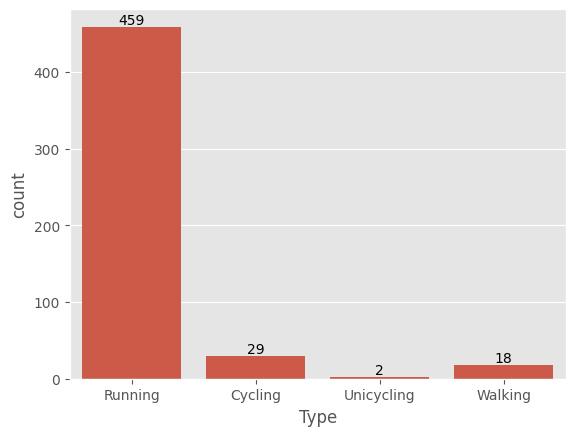

In [253]:
ax=sns.countplot(x='Type',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [187]:
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Type                      508 non-null    object 
 2   Distance (km)             508 non-null    float64
 3   Duration                  508 non-null    object 
 4   Average Pace              508 non-null    object 
 5   Average Speed (km/h)      508 non-null    float64
 6   Calories Burned           508 non-null    float64
 7   Climb (m)                 508 non-null    int64  
 8   Average Heart Rate (bpm)  294 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 35.8+ KB


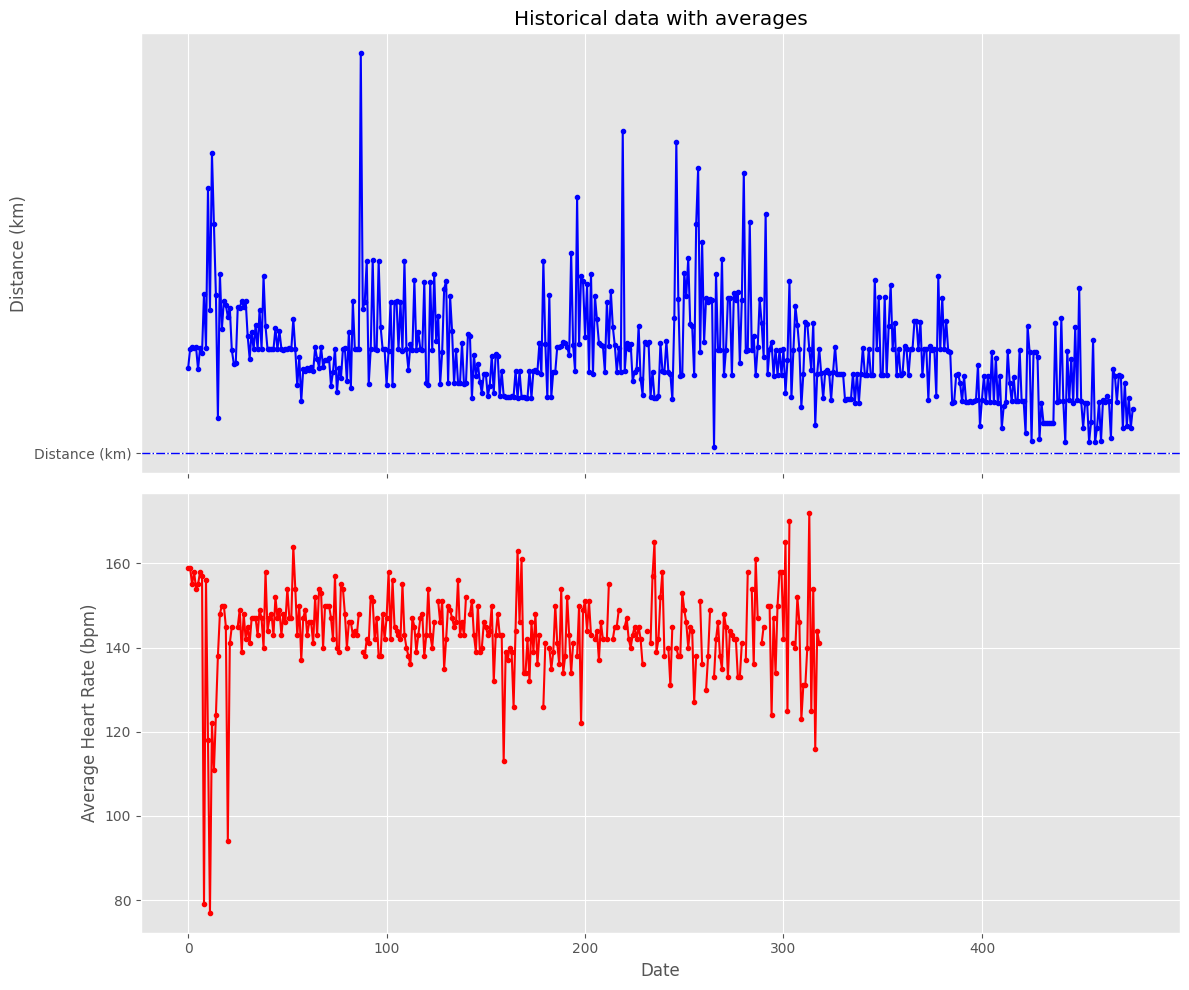

In [204]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot and customize the first subplot
# Plot the 'Distance' metric
runs_subset_2013_2018['Distance (km)'].plot(ax=ax1, linestyle='-', marker='o', markersize=3, color='blue')


# Add a horizontal line for the mean distance
ax1.axhline('Distance (km)', color='blue', linewidth=1, linestyle='-.')

# Customize the first subplot
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.grid(True)  # Add grid for better readability

# Plot and customize the second subplot
# For example, you might want to plot another metric, e.g., 'HeartRate'
runs_subset_2013_2018['Average Heart Rate (bpm)'].plot(ax=ax2, linestyle='-', marker='o', markersize=3, color='red')

# Customize the second subplot
ax2.set(ylabel='Average Heart Rate (bpm)', xlabel='Date')  # Set y-axis label and x-axis label
ax2.grid(True)  # Add grid for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


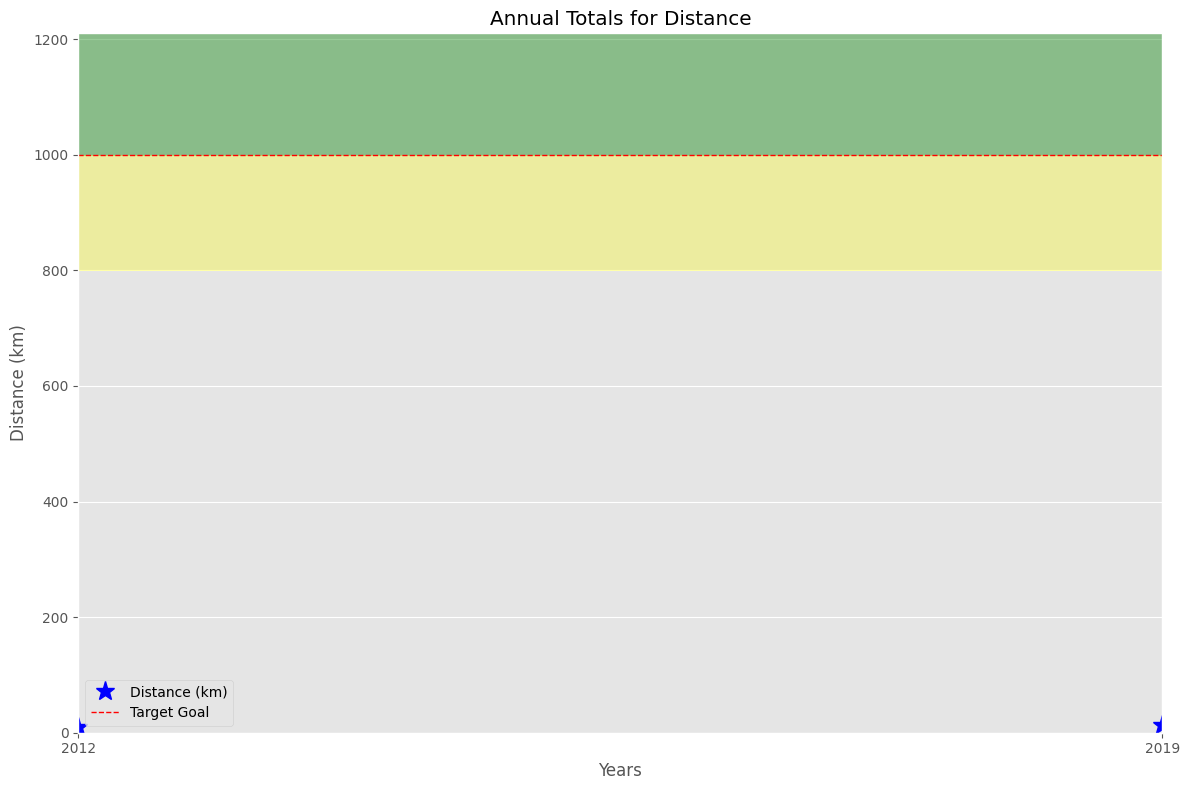

In [209]:
# Create a plot
fig, ax = plt.subplots(figsize=(12, 8))
df_run_dist_annual=runs_subset_2013_2018['Distance (km)']
# Plot annual running distance with stars
df_run_dist_annual.plot(
    marker='*',
    markersize=14,
    linewidth=0,
    color='blue',
    ax=ax
)

# Customize the plot
ax.set(
    ylim=[0, 1210],          # Set y-axis limits
    xlim=['2012', '2019'],   # Set x-axis limits
    ylabel='Distance (km)',  # Y-axis label
    xlabel='Years',          # X-axis label
    title='Annual Totals for Distance'  # Plot title
)

# Highlight regions with background shading
ax.axhspan(1000, 1210, color='green', alpha=0.4)  # Green region for goal achievement
ax.axhspan(800, 1000, color='yellow', alpha=0.3)  # Yellow region for approaching the goal

# Plot the target goal line for clarity
ax.axhline(1000, color='red', linestyle='--', linewidth=1, label='Target Goal')

# Add a legend
ax.legend()

# Add grid for better readability
ax.grid(True)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()


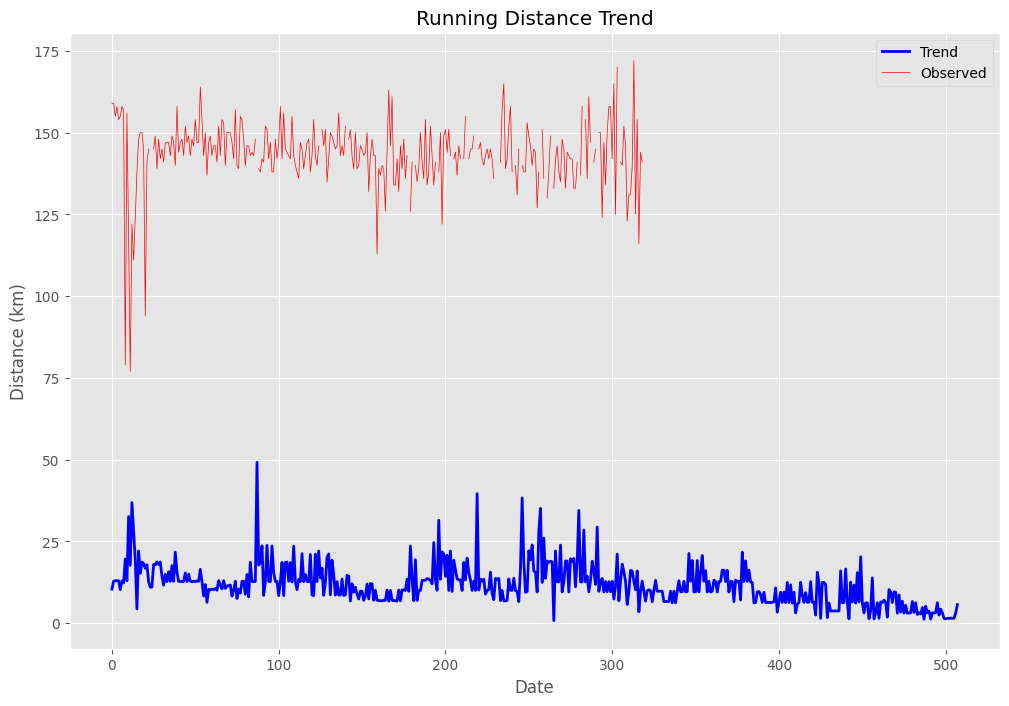

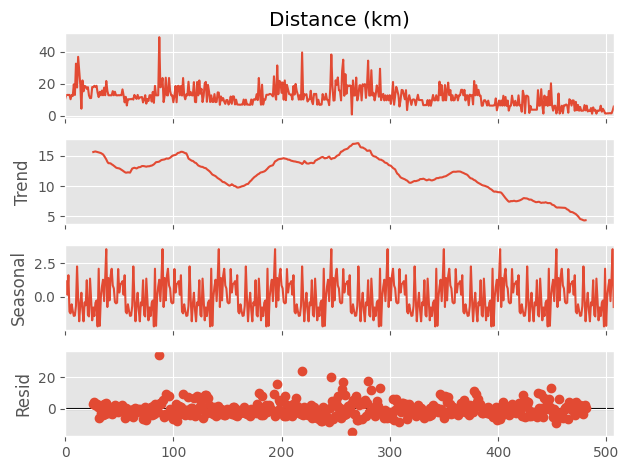

In [240]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12, 8))
# Decompose the weekly distance data
decomposed = sm.tsa.seasonal_decompose(df['Distance (km)'], model='additive', period=52).plot()
ax.plot(df['Distance (km)'],label='Trend', linewidth=2,color='blue')
ax.plot(df['Average Heart Rate (bpm)'],label='Observed', linewidth=0.5,color='red')

ax.legend()
ax.set_title('Running Distance Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Distance (km)')
ax.grid(True)
# Show plot
plt.show()

In [246]:
import pandas as pd

# Example DataFrames for different activities
df_run = df[df['Type'] == 'Running'].copy()
df_walk = df[df['Type'] == 'Walking'].copy()
df_run = df[df['Type'] == 'Cycling'].copy()

# Add a column to identify the type of activity
df_run['Type'] = 'Running'
df_walk['Type'] = 'Walking'
df_run['Type'] = 'Cycling'

# Concatenate the DataFrames
df_run_walk_cycle = pd.concat([df_run, df_walk, df_run], ignore_index=True)


In [247]:
# Define columns of interest
dist_climb_cols = ['Distance (km)', 'Climb (m)']

# Calculate total distance and climb for each activity type
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()
print('Totals for different training types:')
display(df_totals)


Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,1361.16,13952
Walking,33.45,349


In [248]:
# Define columns for summary statistics
speed_col = ['Average Speed (km/h)']

# Calculate summary statistics for each type of activity
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Add total values to the summary DataFrame
for col in dist_climb_cols:
    df_summary[col, 'total'] = df_totals[col]

print('Summary statistics for different training types:')
display(df_summary)


Summary statistics for different training types:


Distance (km)                                                       \
                count       mean       std    min     25%     50%      75%   
Type                                                                         
Cycling          58.0  23.468276  9.367769  11.41  15.530  20.300  29.4000   
Walking          18.0   1.858333  0.880055   1.22   1.385   1.485   1.7875   

               Climb (m)              ... Average Speed (km/h)             \
           max     count        mean  ...                count       mean   
Type                                  ...                                   
Cycling  49.18      58.0  240.551724  ...                 58.0  19.125172   
Walking   4.29      18.0   19.388889  ...                 18.0   5.549444   

                                                        Distance (km)  \
              std    min     25%    50%      75%    max         total   
Type                                                                    
Cycling  3.228402  11.38  16.980  19.50  21.4900  24.33       1361.16   
Walking  1.459309   1.04   5.555   5.97   6.5125   6.91         33.45   

        Climb (m)  
            total  
Type               
Cycling     13952  
Walking       349  

[2 rows x 26 columns]

In [249]:
# Fun facts from your running history
total_distance_run = 5224  # Total distance in km
number_of_shoes_used = 7  # Number of running shoes used

# Calculate average distance a pair of shoes lasts
average_shoes_lifetime = total_distance_run / number_of_shoes_used
print(f'Average distance a pair of shoes lasts: {average_shoes_lifetime:.2f} km')

# Forrest Gump's total running distance
forrest_total_distance = 24700  # Total distance in km

# Calculate the number of pairs of shoes needed
shoes_for_forrest_run = forrest_total_distance / average_shoes_lifetime

# Print the result, rounding to the nearest whole number
print(f'Forrest Gump would need {int(shoes_for_forrest_run)} pairs of shoes!')


Average distance a pair of shoes lasts: 746.29 km
Forrest Gump would need 33 pairs of shoes!
